In [2]:
from sklearn import metrics    
import time
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import numpy as np 
from PIL import Image
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.tree          import DecisionTreeClassifier
from sklearn.ensemble      import RandomForestClassifier
from sklearn.ensemble      import ExtraTreesClassifier
from sklearn.ensemble      import AdaBoostClassifier
from sklearn.ensemble      import GradientBoostingClassifier
from sklearn.experimental  import enable_hist_gradient_boosting 
# Necesary for HistGradientBoostingClassifier
from sklearn.ensemble      import HistGradientBoostingClassifier
from xgboost               import XGBClassifier
from lightgbm              import LGBMClassifier
from catboost              import CatBoostClassifier
import joblib
import sys
sys.path.append(r"C:\Users\Wojtek\OneDrive\Desktop\STRIVE SCHOOL\WojtekRepo\GROUP PROJECT\ROCK SCISORS PAPER")

In [3]:
#Rock= 0
#Paper=1
#Scissor=2

In [4]:
path = 'images'
data1 = pd.DataFrame ()
data2= pd.DataFrame()
for folder in os.listdir(path):
    if folder == 'train':
    
        for f in os.listdir (path + '/' + folder):
            class_data = np.zeros ( (len(os.listdir (path + '/' + folder + '/' + f )), 1025) )
            print('Original shape')
            print (class_data.shape)
        
            for i, img_name in enumerate (os.listdir (path + '/' + folder + '/' + f )):

                img = Image.open (path + '/' + folder + '/' + f + '/' + img_name)
                img_arr = np.array (img, dtype = int)
                img_arr = img_arr.flatten()
                
                class_data [i, :1024] = img_arr
                class_data [i, 1024]  = int (f)  #assigning target to the last column 

            class_data = pd.DataFrame (class_data)
            data1 = pd.concat ([data1, class_data])
            print('Size after concatination')
            print(data1.shape)
    else:
        for f in os.listdir (path + '/' + folder):
            class_data = np.zeros ( (len(os.listdir (path + '/' + folder + '/' + f )), 1025) )
            print('Original shape')
            print (class_data.shape)
        
            for i, img_name in enumerate (os.listdir (path + '/' + folder + '/' + f )):

                img = Image.open (path + '/' + folder + '/' + f + '/' + img_name)
                img_arr = np.array (img, dtype = int)
                img_arr = img_arr.flatten()
                
                class_data [i, :1024] = img_arr
                class_data [i, 1024]  = int (f)  #assigning target to the last column 

            class_data = pd.DataFrame (class_data)
            data2 = pd.concat ([data2, class_data])
            print('Size after concatenation')
            print(data2.shape)

            
data1.to_csv ('train_game.csv')
data2.to_csv('test_game.csv')

            


Original shape
(189, 1025)
Size after concatination
(189, 1025)
Original shape
(177, 1025)
Size after concatination
(366, 1025)
Original shape
(194, 1025)
Size after concatination
(560, 1025)
Original shape
(98, 1025)
Size after concatenation
(98, 1025)
Original shape
(62, 1025)
Size after concatenation
(160, 1025)
Original shape
(85, 1025)
Size after concatenation
(245, 1025)


In [5]:
data2.iloc[:,-1].unique()
data2.shape

(245, 1025)

In [6]:

#checking target column

data1.iloc[:,-1].unique()
data1.shape

(560, 1025)

In [7]:
X_tr = data1.iloc[:,:1024]
y_tr = data1.iloc[:,1024]

X_val = data2.iloc[:,:1024]
y_val = data2.iloc[:,1024]

In [8]:
scaler = StandardScaler()


data_norm_train = scaler.fit_transform(X_tr)
data_norm_test = scaler.transform(X_val)


In [9]:
#sns.histplot(data=data_norm, bins=10)

In [10]:
tree_classifiers = {
  "Decision Tree": DecisionTreeClassifier(),
  "Extra Trees":   ExtraTreesClassifier(),
  "Random Forest": RandomForestClassifier(),
  "AdaBoost":      AdaBoostClassifier(),
  "Skl GBM":       GradientBoostingClassifier(),
  "Skl HistGBM":   GradientBoostingClassifier(),
  "XGBoost":       XGBClassifier(),
  "LightGBM":      LGBMClassifier(),
  "CatBoost":      CatBoostClassifier() 
}

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X_tr, y_tr, test_size=0.2, random_state=42, stratify=y_tr)




results = pd.DataFrame({'Model': [], 'Accuracy': [], 'Bal Acc.': [], 'Time': []})


for model_name, model in tree_classifiers.items(): # FOR EVERY PIPELINE (PREPRO + MODEL) -> TRAIN WITH TRAIN DATA (x_train)
    start_time = time.time()
    model.fit(x_train, y_train)
    pred = model.predict(X_val)    # GET PREDICTIONS USING x_val
    total_time = time.time() - start_time

    results = results.append({"Model":    model_name,
                              "Confusion Matrix": confusion_matrix(y_val, pred),
                              "Accuracy": metrics.accuracy_score(y_val, pred)*100,
                              "Bal Acc.": metrics.balanced_accuracy_score(y_val, pred)*100,
                              "Time":     total_time},
                              ignore_index=True)
                              
                              

 
# Your code goes here


results_ord = results.sort_values(by=['Accuracy'], ascending=False, ignore_index=True)
results_ord.index += 1 
results_ord.style.bar(subset=['Accuracy', 'Bal Acc.'], vmin=0, vmax=100, color='#5fba7d')

C:\Users\Wojtek\anaconda3\envs\wojtek\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:06:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Learning rate set to 0.075952
0:	learn: 1.0156766	total: 187ms	remaining: 3m 7s
1:	learn: 0.9443380	total: 220ms	remaining: 1m 49s
2:	learn: 0.8817165	total: 259ms	remaining: 1m 26s
3:	learn: 0.8225257	total: 298ms	remaining: 1m 14s
4:	learn: 0.7701426	total: 332ms	remaining: 1m 6s
5:	learn: 0.7203991	total: 368ms	remaining: 1m
6:	learn: 0.6735677	total: 408ms	remaining: 57.9s
7:	learn: 0.6333493	total: 444ms	remaining: 55.1s
8:	learn: 0.6021877	total: 489ms	remaining: 53.8s
9:	learn: 0.5730524	total: 525ms	remaining: 52s
10:	learn: 0.5373980	total: 562ms	remaining: 50.5s
11:	learn: 0.5134061	total: 600ms	remaining: 49.4s
12:	learn: 0.4890452	total: 638ms	remaining: 48.5s
13:	lear

,Model,Accuracy,Bal Acc.,Time,Confusion Matrix
1,LightGBM,85.714286,86.264829,0.523734,[[87 3 8] [ 2 58 2] [15 5 65]]
2,Random Forest,84.081633,84.259768,0.187497,[[87 10 1] [ 1 55 6] [ 9 12 64]]
3,XGBoost,83.673469,83.576656,1.172541,[[87 6 5] [ 3 53 6] [13 7 65]]
4,Extra Trees,83.265306,83.184500,0.195421,[[87 9 2] [ 1 53 8] [10 11 64]]
5,CatBoost,82.040816,82.964670,36.063035,[[77 9 12] [ 0 56 6] [ 8 9 68]]
6,Skl GBM,77.959184,79.053686,3.070232,[[74 8 16] [ 1 55 6] [14 9 62]]
7,Skl HistGBM,77.959184,79.001665,2.830051,[[75 8 15] [ 1 55 6] [15 9 61]]
8,Decision Tree,75.510204,75.016716,0.030915,[[84 10 4] [ 2 47 13] [17 14 54]]
9,AdaBoost,72.653061,74.621332,0.372785,[[64 16 18] [ 1 56 5] [ 6 21 58]]


In [29]:
#saving model
the_best_model = results_ord.iloc[0,0]
model = tree_classifiers[the_best_model]
model_choice = 'best_model.sav'
joblib.dump(model, model_choice)

['best_model.sav']

In [30]:
#loading model
loaded_model = joblib.load(model_choice)
result = loaded_model.score(X_val, y_val)
print(result)

0.8571428571428571


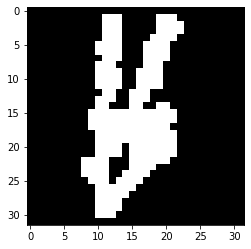

In [67]:
import cv2
import matplotlib.pyplot as plt

rawimage = cv2.imread(r'C:\Users\Wojtek\OneDrive\Desktop\STRIVE SCHOOL\WojtekRepo\GROUP PROJECT\ROCK SCISORS PAPER\handgestures\images\validation1\2\1628508702.0265074_Manikanta.png')

plt.imshow(rawimage, cmap= 'gray')

#rawimage.shape

In [65]:
type(rawimage)

numpy.ndarray

Please try with another image!


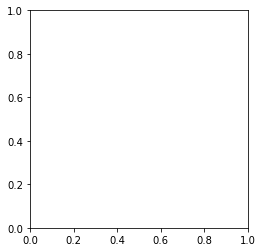

In [50]:
#Transform the Image into 32 x 32 skeleton using transform_image.py

from handgestures.transform_image import transform_single_image

try:
      
    img = transform_single_image(rawimage)
    plt.imshow(img, cmap="gray")  
except:
    
    print('Please try with another image!')
    



In [69]:
img = np.array(rawimage).flatten()
img = img.reshape(1,3072)
rawimage.shape

(32, 32, 3)

In [68]:
loaded_model.predict(rawimage)

ValueError: Found array with dim 3. Estimator expected <= 2.